## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_df = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df["Mouse ID"].nunique()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_df = cleaned_mouse_df.groupby(['Drug Regimen'])
regimen_df.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [11]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_tumor_mean = regimen_df['Tumor Volume (mm3)'].mean()
regimen_tumor_median = regimen_df['Tumor Volume (mm3)'].median()
regimen_tumor_variance = regimen_df['Tumor Volume (mm3)'].var()
regimen_tumor_std = regimen_df['Tumor Volume (mm3)'].std()
regimen_tumor_sem = regimen_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary = pd.DataFrame({
    "Tumor Volume Mean":regimen_tumor_mean,
    "Tumor Volume Median":regimen_tumor_median,
    "Tumor Volume Variance":regimen_tumor_variance,
    "Tumor Volume STD":regimen_tumor_std,
    "Tumor Volume SEM":regimen_tumor_sem
})
regimen_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
regimen_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

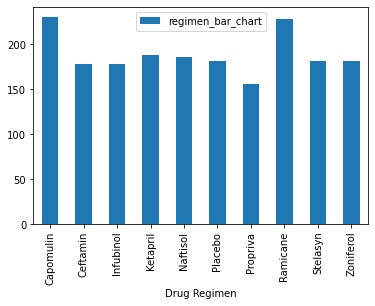

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = regimen_df['Drug Regimen'].count()


regimen_bar_chart = pd.DataFrame({
    "regimen_bar_chart":regimen_count
})

drug_names= regimen_bar_chart.index.values

panda_bar_chart = regimen_bar_chart.plot.bar()
plt.show()

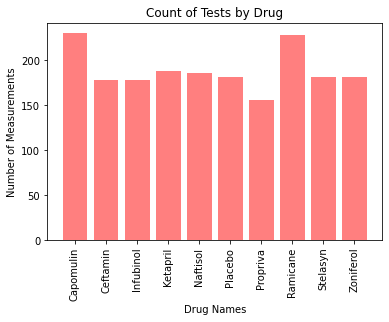

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_names,regimen_count, color='r',alpha=0.5,align='center')
plt.title("Count of Tests by Drug")
plt.xlabel("Drug Names")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=90)
plt.show()

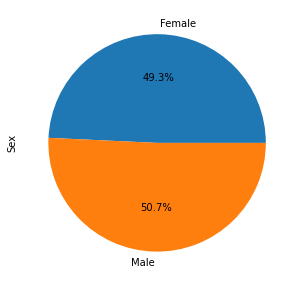

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_mouse_df.groupby(['Sex'])
gender_count = gender_df['Sex'].count()
genders = gender_count.index.values

gender_pie = gender_count.plot.pie(y='Count', figsize=(5, 5), autopct='%1.1f%%')

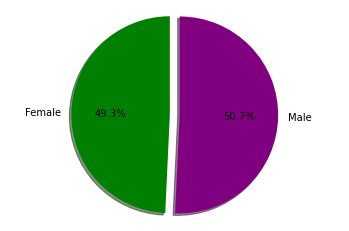

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1,0)
colors = ("green", "purple")

plt.pie(gender_count,explode=explode, labels=genders,colors=colors,
       autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Sort by the time point to ensure they are in order
cleaned_mouse_sorted_df =  cleaned_mouse_df.sort_values(by=['Timepoint'])

#Filter to only the specified drugs
cleaned_mouse_sorted_drugdropped_df = cleaned_mouse_sorted_df.loc[cleaned_mouse_sorted_df['Drug Regimen'].isin(['Ceftamin',
                                                                  'Ramicane','Infubinol','Capomulin'])]

#Remove all mouse ids except the last, which is the last time point. 
tumor_volume_df = cleaned_mouse_sorted_drugdropped_df.drop_duplicates(subset=['Mouse ID'], keep='last')
#tumor_volume_df['Mouse ID'].count()
tumor_volume_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
940,h531,Ceftamin,Male,5,27,5,47.784682,0
...,...,...,...,...,...,...,...,...
309,b128,Capomulin,Female,9,22,45,38.982878,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
540,a685,Infubinol,Male,8,30,45,66.083066,3


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#I sorted the above table by the time point and then dropped all duplicate mouse ids except for the last entry. 
#This effectivley complete both of these steps

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = tumor_volume_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = {}

#for drug in drugs:
#    tumor_data[f'{drug}'] = []

#for index, row in tumor_volume_df.iterrows():
#   #if drug == tumor_data[row['Drug Regimen']]
#   tumor_data[row['Drug Regimen']].append(row['Tumor Volume (mm3)'])

ceftamin_tumor_volume_df = tumor_volume_df[(tumor_volume_df['Drug Regimen'] == 'Ceftamin')]
ceftamin_tumor_volume_list = ceftamin_tumor_volume_df['Tumor Volume (mm3)']

ramicane_tumor_volume = tumor_volume_df[(tumor_volume_df['Drug Regimen'] == 'Ramicane')]
ramicane_tumor_volume_list = ramicane_tumor_volume['Tumor Volume (mm3)']

infubinol_tumor_volume = tumor_volume_df[(tumor_volume_df['Drug Regimen'] == 'Infubinol')]
infubinol_tumor_volume_list = infubinol_tumor_volume['Tumor Volume (mm3)']

capomulin_tumor_volume = tumor_volume_df[(tumor_volume_df['Drug Regimen'] == 'Capomulin')]
capomulin_tumor_volume_list = capomulin_tumor_volume['Tumor Volume (mm3)']
    
drug_regimen_tumor_data = [ceftamin_tumor_volume_list,ramicane_tumor_volume_list,infubinol_tumor_volume_list,capomulin_tumor_volume_list]

#ceftamin_tumor_volume_df.head()
#print(drugs)
#print(tumor_data['Ceftamin'])
#print(drug_regimen_tumor_data)

In [22]:
ceftamin_quartiles = ceftamin_tumor_volume_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_lower_quantile = ceftamin_quartiles[0.25]
ceftamin_upper_quantile = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upper_quantile-ceftamin_lower_quantile

# Determine outliers using upper and lower bounds
ceftamin_lower_bound = ceftamin_lower_quantile - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upper_quantile + (1.5*ceftamin_iqr)

print(f'The lower quartile for Ceftamin is {ceftamin_lower_quantile}')
print(f'The upper quartile for Ceftamin is {ceftamin_upper_quantile}')
print(f'The inter quartile range for Ceftamin is {ceftamin_iqr}')
print(f'The lower bound for Ceftamin is {ceftamin_lower_bound}')
print(f'The upper quartile for Ceftamin is {ceftamin_upper_bound}')

The lower quartile for Ceftamin is 48.72207785
The upper quartile for Ceftamin is 64.29983003
The inter quartile range for Ceftamin is 15.577752179999997
The lower bound for Ceftamin is 25.355449580000002
The upper quartile for Ceftamin is 87.66645829999999


In [23]:
ramicane_quartiles = ramicane_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lower_quantile = ramicane_quartiles[0.25]
ramicane_upper_quantile = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upper_quantile-ramicane_lower_quantile

# Determine outliers using upper and lower bounds
ramicane_lower_bound = ramicane_lower_quantile - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upper_quantile + (1.5*ramicane_iqr)

print(f'The lower quartile for Ramicane is {ramicane_lower_quantile}')
print(f'The upper quartile for Ramicane is {ramicane_upper_quantile}')
print(f'The inter quartile range for Ramicane is {ramicane_iqr}')
print(f'The lower bound for Ramicane is {ramicane_lower_bound}')
print(f'The upper quartile for Ramicane is {ramicane_upper_bound}')

The lower quartile for Ramicane is 31.56046955
The upper quartile for Ramicane is 40.65900627
The inter quartile range for Ramicane is 9.098536719999998
The lower bound for Ramicane is 17.912664470000003
The upper quartile for Ramicane is 54.30681135


In [24]:
infubinol_quartiles = infubinol_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_lower_quantile = infubinol_quartiles[0.25]
infubinol_upper_quantile = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upper_quantile-infubinol_lower_quantile

# Determine outliers using upper and lower bounds
infubinol_lower_bound = infubinol_lower_quantile - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upper_quantile + (1.5*infubinol_iqr)

print(f'The lower quartile for Infubinol is {infubinol_lower_quantile}')
print(f'The upper quartile for Infubinol is {infubinol_upper_quantile}')
print(f'The inter quartile range for Infubinol is {infubinol_iqr}')
print(f'The lower bound for Infubinol is {infubinol_lower_bound}')
print(f'The upper quartile for Infubinol is {infubinol_upper_bound}')

The lower quartile for Infubinol is 54.04860769
The upper quartile for Infubinol is 65.52574285
The inter quartile range for Infubinol is 11.477135160000003
The lower bound for Infubinol is 36.83290494999999
The upper quartile for Infubinol is 82.74144559000001


In [25]:
capomulin_quartiles = capomulin_tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_lower_quantile = capomulin_quartiles[0.25]
capomulin_upper_quantile = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upper_quantile-capomulin_lower_quantile

# Determine outliers using upper and lower bounds
capomulin_lower_bound = capomulin_lower_quantile - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upper_quantile + (1.5*capomulin_iqr)

print(f'The lower quartile for Capomulin is {capomulin_lower_quantile}')
print(f'The upper quartile for Capomulin is {capomulin_upper_quantile}')
print(f'The inter quartile range for Capomulin is {capomulin_iqr}')
print(f'The lower bound for Capomulin is {capomulin_lower_bound}')
print(f'The upper quartile for Capomulin is {capomulin_upper_bound}')

The lower quartile for Capomulin is 32.37735684
The upper quartile for Capomulin is 40.1592203
The inter quartile range for Capomulin is 7.781863460000004
The lower bound for Capomulin is 20.70456164999999
The upper quartile for Capomulin is 51.83201549


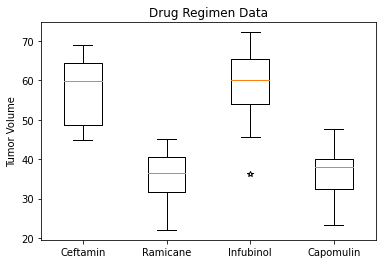

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#box_plot_data = [data, ]

fig1, ax1 = plt.subplots()
#gfig1, ax1 = tumor_volume_df['Drug Regimen']
ax1.set_xticklabels(['Ceftamin', 'Ramicane', 'Infubinol', 'Capomulin'])
ax1.set_ylabel("Tumor Volume")
ax1.set_title("Drug Regimen Data")
ax1.boxplot(drug_regimen_tumor_data, 0, '*')
plt.show()  

## Line and Scatter Plots

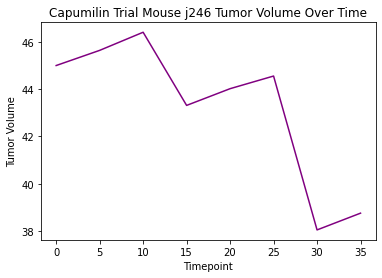

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capumulin_df = cleaned_mouse_sorted_drugdropped_df[(cleaned_mouse_sorted_drugdropped_df['Drug Regimen'] == 'Capomulin')]
capumulin_j246_df = capumulin_df[(capumulin_df['Mouse ID'] == 'j246')]
capomulin_j246_tumor_volume_df = capumulin_j246_df['Tumor Volume (mm3)']
capomulin_j246_timepoint_df = capumulin_j246_df['Timepoint']
#capumulin_df.head()
#print(capomulin_tumor_volume_df)

capomulin_tumorvolume = plt.plot(capomulin_j246_timepoint_df, capomulin_j246_tumor_volume_df, color='purple', label='Tumor Volume')
plt.title('Capumilin Trial Mouse j246 Tumor Volume Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()
#capomulin_timepoint = plat.plot()

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capumulin_groupedby_weight_df = capumulin_df.groupby(['Weight (g)']).mean()
capumulin_groupedby_weight_df.head()



,Age_months,Timepoint,Tumor Volume (mm3),Metastatic Sites
Weight (g),,,,
15,16.000000,22.500000,36.182040,0.000000
17,14.769231,21.538462,37.214133,1.030769
19,7.666667,22.500000,41.182391,0.700000
20,23.000000,22.500000,39.141053,0.600000
21,17.458333,21.666667,42.088700,0.625000


<function matplotlib.pyplot.show(*args, **kw)>

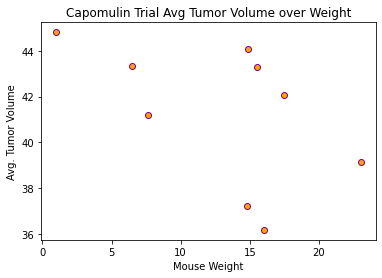

In [29]:
capomulin_groupedby_weight_tumor_volume_df = capumulin_groupedby_weight_df['Tumor Volume (mm3)']
capomulin_groupedby_weight_weight_df = capumulin_groupedby_weight_df.iloc[:,0]

plt.scatter(capomulin_groupedby_weight_weight_df,capomulin_groupedby_weight_tumor_volume_df, facecolors='orange', edgecolors='purple')
plt.title('Capomulin Trial Avg Tumor Volume over Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg. Tumor Volume')
plt.show
#capomulin_groupedby_weight_weight_df

## Correlation and Regression

The correlation between weight and average tumor volume is -0.52


<function matplotlib.pyplot.show(*args, **kw)>

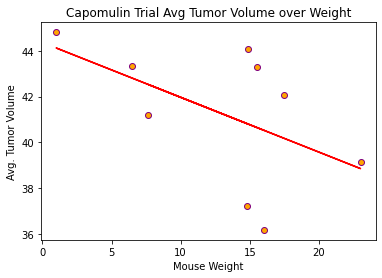

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_groupedby_weight_weight_df, capomulin_groupedby_weight_tumor_volume_df)
correlation = st.pearsonr(capomulin_groupedby_weight_weight_df,capomulin_groupedby_weight_tumor_volume_df)

plt.scatter(capomulin_groupedby_weight_weight_df,capomulin_groupedby_weight_tumor_volume_df, facecolors='orange', edgecolors='purple')
plt.title('Capomulin Trial Avg Tumor Volume over Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg. Tumor Volume')
regress_values = capomulin_groupedby_weight_weight_df * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(capomulin_groupedby_weight_weight_df,regress_values,"r-")
print(f'The correlation between weight and average tumor volume is {round(correlation[0],2)}')
plt.show